In [18]:
import numpy as np
import utils
import matplotlib.pyplot as plt

In [19]:
X, y = utils.load_data()

classes = {
    'Fake': 'blue',
    'Real': 'orange'
}

### Fit uni-variate Gaussian models to the different features of the project data.
For each component of the feature vectors, compute the ML estimate for the parameters of a 1D Gaussian distribution. 

In [20]:
def log_gau_pdf(X, mu, sigma):
    
    if X.shape[0] < X.shape[1]:
        X = X.T
    
    _, d = X.shape # n: samples, d: features,
    X_c = X - mu.reshape(1, -1)
    inv_sigma = np.linalg.inv(sigma)
    sign, log_det_sigma = np.linalg.slogdet(sigma)
    det_sign = sign * log_det_sigma
    quad_form = np.sum(X_c @ inv_sigma * X_c, axis=1)
    log_pdf = -0.5 * (d * np.log(2 * np.pi) + det_sign + quad_form)
    
    return log_pdf

Plot the distribution density on top of the normalized histogram of the data.

<Figure size 640x480 with 0 Axes>

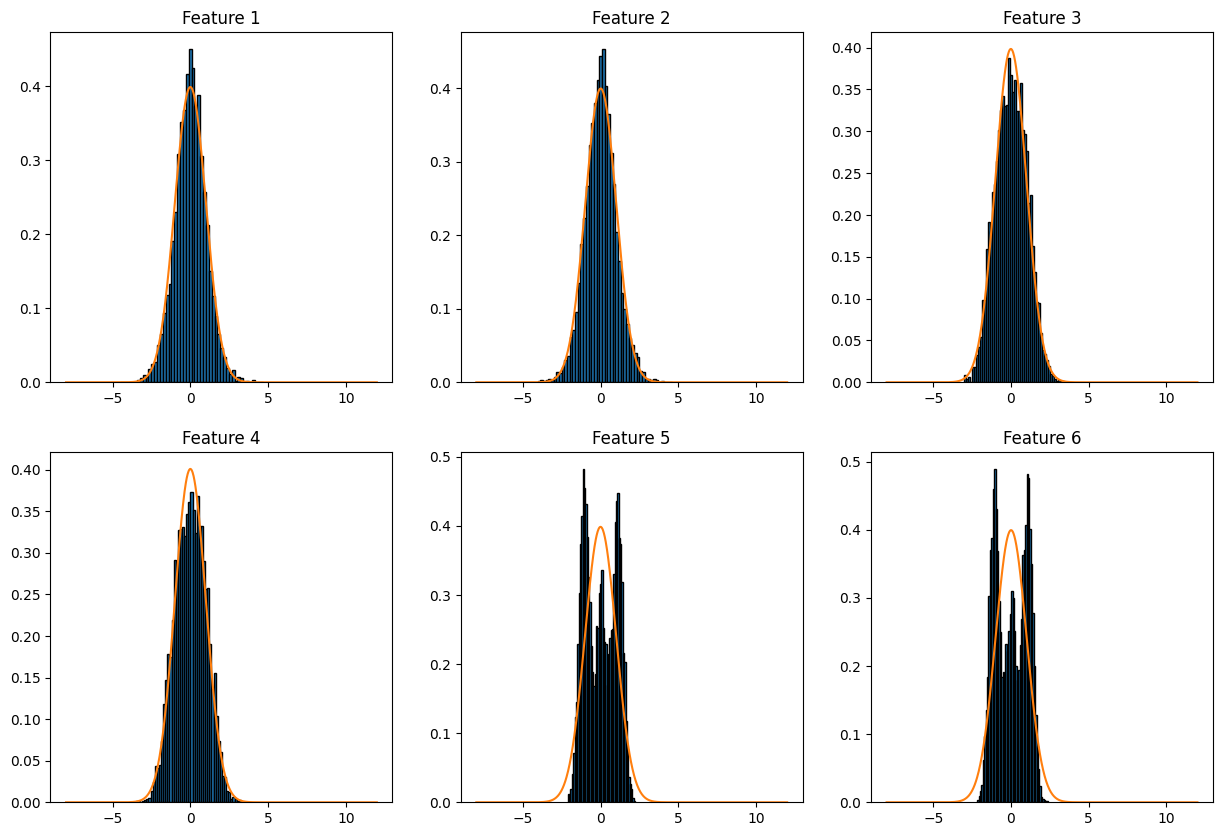

In [21]:
Xplot = np.linspace(-8, 12, 1000).reshape(-1, 1)

plt.figure()
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
for i in range(6):
    X_1 = X[i:i+1, :].T
    mean = np.mean(X_1, axis=0).reshape(-1, 1)
    cov = np.dot((X_1 - mean).T, (X_1 - mean)) / X_1.shape[0]
    
    ax = axs[i//3, i%3]
    ax.hist(X_1, bins=50, density=True, ec='black')
    ax.plot(Xplot.ravel(), np.exp(log_gau_pdf(Xplot, mean, cov)))
    ax.set_title(f'Feature {i+1}')